# Progress Report 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("merged_top500_clean.csv")

df.head() #confirming that it is loaded correctly

C:\Users\Owner\AppData\Local\Temp\ipykernel_3180\935242254.py:5: DtypeWarning: Columns (25,26,30,32,34,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_top500_clean.csv")


,Rank,Site,Manufacturer,Computer,Country,Year,Processors,Nmax,Nhalf,Processor Family,...,HPCG [TFlop/s],Power Effeciency [GFlops/Watts],Site ID,System ID,Power Efficiency [GFlops/Watts],Memory,Energy Efficiency [GFlops/Watts],RMax (Flop/s),RPeak (Flop/s),Power (W)
0,1,Los Alamos National Laboratory,Thinking Machines Corporation,CM-5/1024,United States,1993,1024.0,52224.0,24064.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.7,131.00,NaN
1,2,Minnesota Supercomputer Center,Thinking Machines Corporation,CM-5/544,United States,1993,544.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,69.63,NaN
2,3,NCSA,Thinking Machines Corporation,CM-5/512,United States,1993,512.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,65.54,NaN
3,4,National Security Agency,Thinking Machines Corporation,CM-5/512,United States,1993,512.0,36864.0,16384.0,Sparc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.4,65.54,NaN
4,5,NEC,NEC,SX-3/44R,Japan,1990,4.0,6400.0,830.0,NEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.2,25.60,NaN


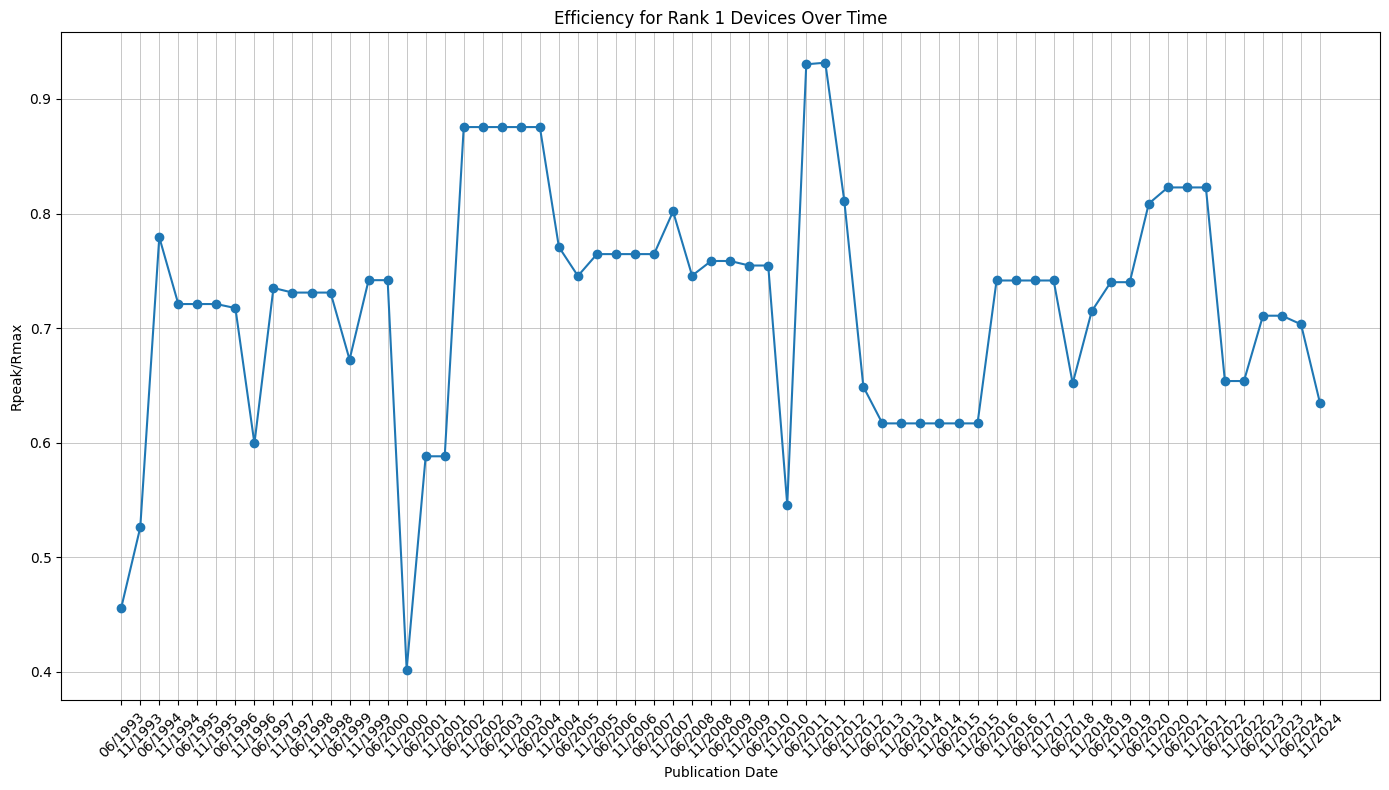

In [ ]:
plt.figure(figsize=(14, 8))  
plt.plot(rank_1_devices['Publication Date'], rank_1_devices['Rmax_Rpeak'], marker='o')
plt.xlabel('Publication Date')
plt.ylabel('Rpeak/Rmax')
plt.title('Efficiency for Rank 1 Devices Over Time')
plt.xticks(rotation=45)
plt.grid(visible=True, which='major', linestyle='-', linewidth=0.5) 
plt.tight_layout()
plt.show()

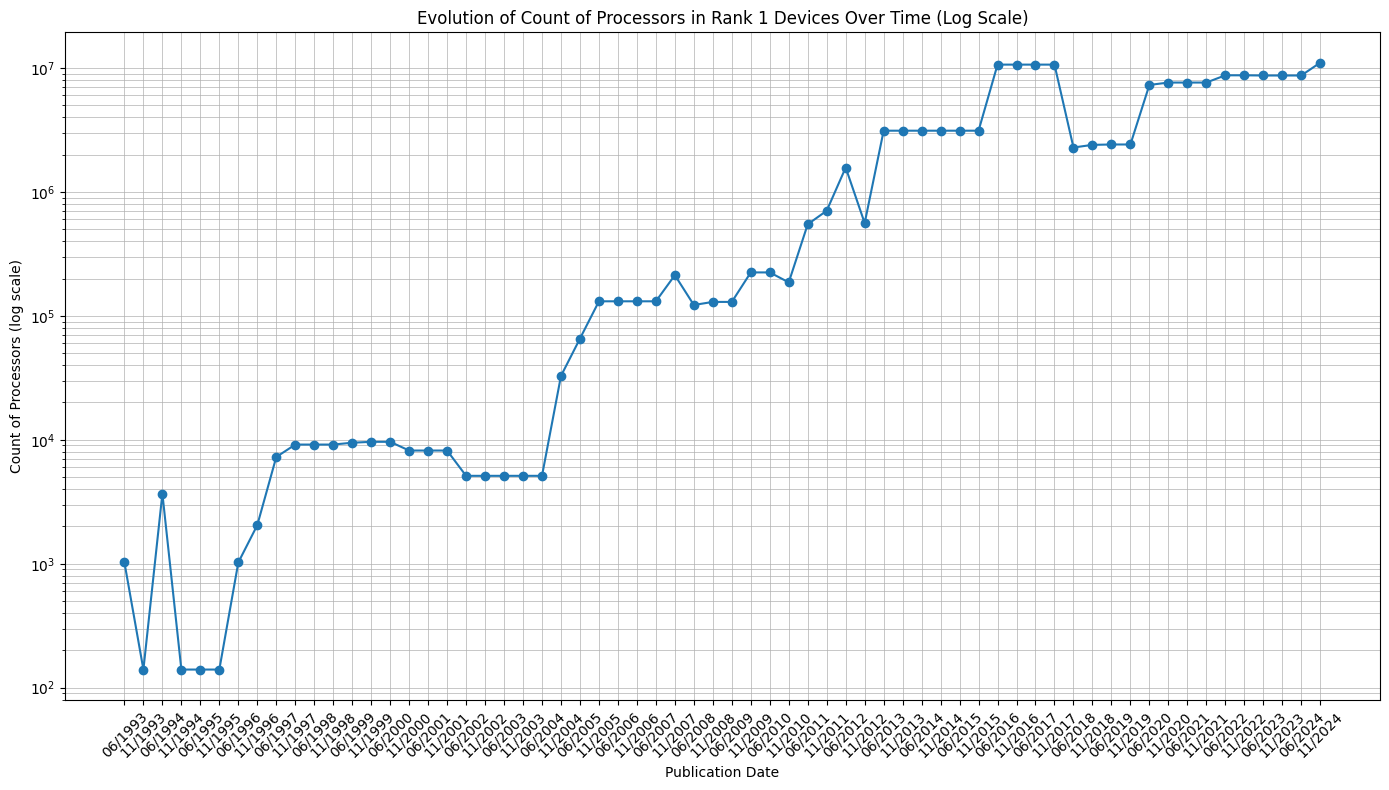

In [13]:
plt.figure(figsize=(14, 8))
plt.plot(rank_1_devices['Publication Date'], rank_1_devices['Processors'], marker='o')
plt.xlabel('Publication Date')
plt.ylabel('Count of Processors (log scale)')
plt.title('Evolution of Count of Processors in Rank 1 Devices Over Time (Log Scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(visible=True, which='both', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


Top 10 Computers by Processor Count:


,Site,Computer,Processors,Year,RMax (Flop/s),RPeak (Flop/s)
24503,Japan Agency for Marine-Earth Science and Tech...,"ZettaScaler-2.2 HPC system, Xeon D-1571 16C 1....","19,860,000",2017,"19,135.80","28,192.00"
31500,DOE/NNSA/LLNL,"HPE Cray EX255a, AMD 4th Gen EPYC 24C 1.8GHz, ...","11,039,616",2024,"1,742,000.00","2,746,376.09"
23000,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014,593.88","125,435,904.00"
29506,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"
30510,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"
31514,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"
26002,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"
31012,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"
26502,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"
27503,National Supercomputing Center in Wuxi,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway","10,649,600",2016,"93,014.59","125,435.90"


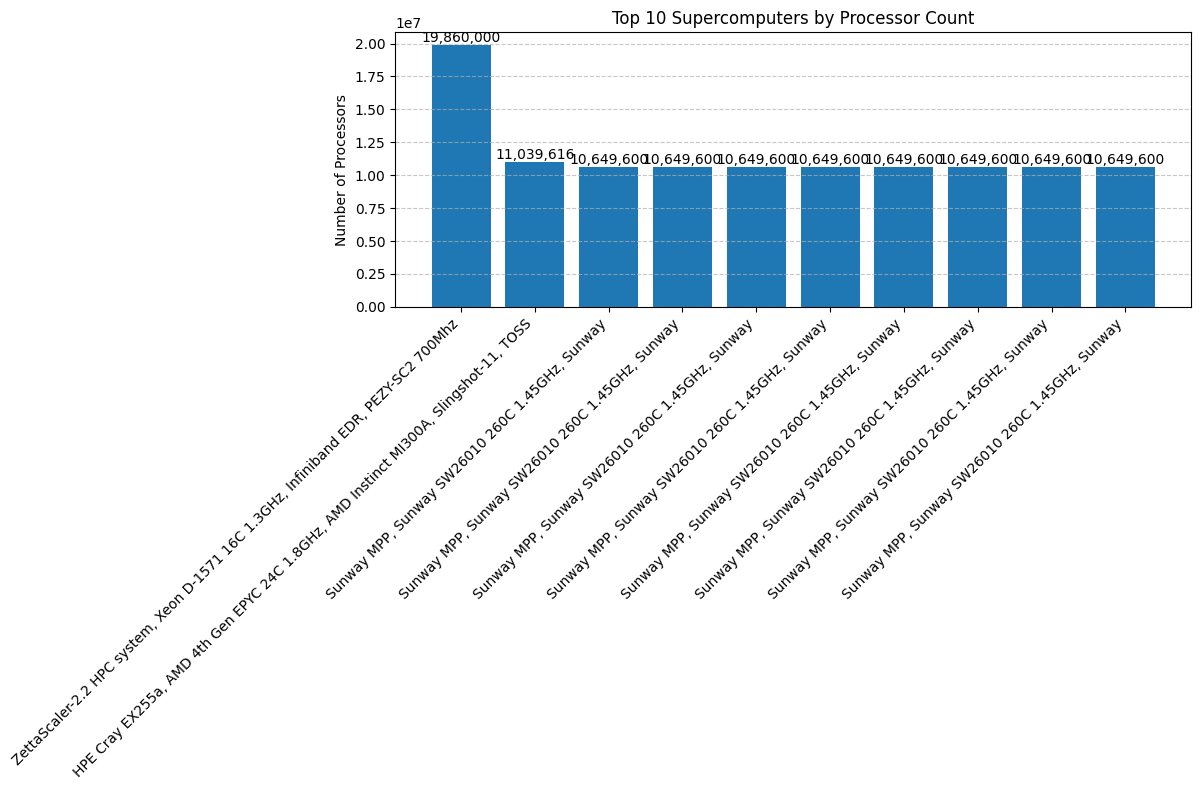

In [14]:
# Let's find the top 10 computers by processor count
top_processors = df.sort_values('Processors', ascending=False).head(10)[['Site', 'Computer', 'Processors', 'Year', 'RMax (Flop/s)', 'RPeak (Flop/s)']]

# Format the values to make them more readable
top_processors['Processors'] = top_processors['Processors'].apply(lambda x: f"{x:,.0f}")
top_processors['RMax (Flop/s)'] = top_processors['RMax (Flop/s)'].apply(lambda x: f"{x:,.2f}")
top_processors['RPeak (Flop/s)'] = top_processors['RPeak (Flop/s)'].apply(lambda x: f"{x:,.2f}")

# Display the table
print("Top 10 Computers by Processor Count:")
display(top_processors)

# Create a bar chart for visualization
plt.figure(figsize=(12, 8))
processors_plot = df.sort_values('Processors', ascending=False).head(10)
bars = plt.bar(range(len(processors_plot)), processors_plot['Processors'])
plt.xticks(range(len(processors_plot)), processors_plot['Computer'], rotation=45, ha='right')
plt.ylabel('Number of Processors')
plt.title('Top 10 Supercomputers by Processor Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', rotation=0)

plt.show()